In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu,True)

import numpy as np
import tensorflow as tf
import polars as pl

# Load the data (assuming your data files are in the correct directory as specified)
directory = '/app/data/filteredData'
balltoball = pl.read_csv(os.path.join(directory, 'balltoball.csv'))
teamStats = pl.read_csv(os.path.join(directory, 'team12Stats.csv'))
playersStats = pl.read_csv(os.path.join(directory, 'playersStats.csv'))


partitions = teamStats.partition_by(['match_id', 'flip'])
partitions = np.array([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
tstf = tf.data.Dataset.from_tensor_slices(partitions)
partitions = playersStats.partition_by(['match_id', 'flip'])
partitions = np.array([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
pstf = tf.data.Dataset.from_tensor_slices(partitions)
partitions = balltoball.partition_by(['match_id', 'flip'])
# Create a ragged tensor from a list of tensors
ragged_tensor = tf.ragged.constant([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
bbtf = tf.data.Dataset.from_tensor_slices(ragged_tensor)


# Print the shapes of the datasets
for sample in tstf.take(1):
    print("Team Stats Sample Shape:", sample.shape)

for sample in pstf.take(1):
    print("Players Stats Sample Shape:", sample.shape)

for sample in bbtf.take(1):
    print("Ball to Ball Stats Sample Shape:", sample.shape)
    print("Ball to Ball Stats Sample Value:", sample[0])

combined_dataset = tf.data.Dataset.zip((tstf, pstf, bbtf))
for sample in combined_dataset.take(1):
    print("Team Stats Sample Shape:", sample[0].shape)
    print("Players Stats Sample Shape:", sample[1].shape)
    print("Ball to Ball Stats Sample Shape:", sample[2].shape)
    print("Sample 0:", sample)


# Assuming `combined_dataset` is your tf.data.Dataset containing the ball stats and labels
def extract_labels_and_data(combined_dataset):
    data_samples = []
    labels = []
    for sample in combined_dataset:
        # Convert ragged tensor to uniform tensor
        ball_stats = sample[2].to_tensor()
        # Extract ball stats and labels
        data_sample = ball_stats[:, :-1]  # Assuming last column is the label
        label = ball_stats[:, -1]  # Last column as labels
        data_samples.append(data_sample)
        labels.append(label)
    return data_samples, labels

ball_data_samples, labels = extract_labels_and_data(combined_dataset)
# Prepare the data for training
def prepare_dataset(combined_dataset):
    team_stats_data = []
    player_stats_data = []
    ball_stats_data = []
    labels = []
    for sample in combined_dataset:
        team_stats_sample = sample[0]
        player_stats_sample = sample[1]
        ball_stats_sample = sample[2].to_tensor()

        # Assuming last column is the label
        data_sample = ball_stats_sample[:, :-1]
        label = ball_stats_sample[0, -1]  # Assuming label is the same across the sequence

        team_stats_data.append(team_stats_sample)
        player_stats_data.append(player_stats_sample)
        ball_stats_data.append(data_sample)
        labels.append(label)

    # Pad ball_stats_data sequences to the same length
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    ball_stats_data = pad_sequences([data.numpy() for data in ball_stats_data], padding='post', dtype='float32')

    return (tf.stack(team_stats_data), tf.stack(player_stats_data), tf.convert_to_tensor(ball_stats_data)), tf.convert_to_tensor(labels)

# Prepare the dataset
inputs, labels = prepare_dataset(combined_dataset)

# save the prepared data
tf.data.experimental.save(inputs, '/app/data/reshaped/inputs')

# Adjust input shapes based on prepared data
team_input_shape = inputs[0].shape[1:]
player_input_shape = inputs[1].shape[1:]
team_input_shape, player_input_shape, inputs[2].shape, labels.shape
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu,True)

import numpy as np
import tensorflow as tf
import polars as pl

# Load the data (assuming your data files are in the correct directory as specified)
directory = '/app/data/filteredData'
balltoball = pl.read_csv(os.path.join(directory, 'balltoball.csv'))
teamStats = pl.read_csv(os.path.join(directory, 'team12Stats.csv'))
playersStats = pl.read_csv(os.path.join(directory, 'playersStats.csv'))


partitions = teamStats.partition_by(['match_id', 'flip'])
partitions = np.array([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
tstf = tf.data.Dataset.from_tensor_slices(partitions)
partitions = playersStats.partition_by(['match_id', 'flip'])
partitions = np.array([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
pstf = tf.data.Dataset.from_tensor_slices(partitions)
partitions = balltoball.partition_by(['match_id', 'flip'])
# Create a ragged tensor from a list of tensors
ragged_tensor = tf.ragged.constant([partition.drop(['match_id','flip']).to_numpy() for partition in partitions])
bbtf = tf.data.Dataset.from_tensor_slices(ragged_tensor)


# Print the shapes of the datasets
for sample in tstf.take(1):
    print("Team Stats Sample Shape:", sample.shape)

for sample in pstf.take(1):
    print("Players Stats Sample Shape:", sample.shape)

for sample in bbtf.take(1):
    print("Ball to Ball Stats Sample Shape:", sample.shape)
    print("Ball to Ball Stats Sample Value:", sample[0])

combined_dataset = tf.data.Dataset.zip((tstf, pstf, bbtf))
for sample in combined_dataset.take(1):
    print("Team Stats Sample Shape:", sample[0].shape)
    print("Players Stats Sample Shape:", sample[1].shape)
    print("Ball to Ball Stats Sample Shape:", sample[2].shape)
    print("Sample 0:", sample)

# Assuming `combined_dataset` is your tf.data.Dataset containing the ball stats and labels
def extract_labels_and_data(combined_dataset):
    data_samples = []
    labels = []
    for sample in combined_dataset:
        # Convert ragged tensor to uniform tensor
        ball_stats = sample[2].to_tensor()
        # Extract ball stats and labels
        data_sample = ball_stats[:, :-1]  # Assuming last column is the label
        label = ball_stats[:, -1]  # Last column as labels
        data_samples.append(data_sample)
        labels.append(label)
    return data_samples, labels

ball_data_samples, labels = extract_labels_and_data(combined_dataset)
# Prepare the data for training
def prepare_dataset(combined_dataset):
    team_stats_data = []
    player_stats_data = []
    ball_stats_data = []
    labels = []
    for sample in combined_dataset:
        team_stats_sample = sample[0]
        player_stats_sample = sample[1]
        ball_stats_sample = sample[2].to_tensor()

        # Assuming last column is the label
        data_sample = ball_stats_sample[:, :-1]
        label = ball_stats_sample[0, -1]  # Assuming label is the same across the sequence

        team_stats_data.append(team_stats_sample)
        player_stats_data.append(player_stats_sample)
        ball_stats_data.append(data_sample)
        labels.append(label)

    # Pad ball_stats_data sequences to the same length
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    ball_stats_data = pad_sequences([data.numpy() for data in ball_stats_data], padding='post', dtype='float32')

    return (tf.stack(team_stats_data), tf.stack(player_stats_data), tf.convert_to_tensor(ball_stats_data)), tf.convert_to_tensor(labels)

# Prepare the dataset
inputs, labels = prepare_dataset(combined_dataset)

# Adjust input shapes based on prepared data
team_input_shape = inputs[0].shape[1:]
player_input_shape = inputs[1].shape[1:]
print(team_input_shape, player_input_shape, inputs[2].shape, labels.shape)


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import layers
# Define the Team Stats Model (DNN)
class TeamStatsModel(tf.keras.Model):
    def __init__(self, input_shape):
        super(TeamStatsModel, self).__init__()
        self.dense1 = layers.Dense(64, activation="relu", kernel_initializer="he_normal")
        self.bn1 = layers.BatchNormalization()
        self.dropout1 = layers.Dropout(0.3)
        
        self.dense2 = layers.Dense(32, activation="relu", kernel_initializer="he_normal")
        self.bn2 = layers.BatchNormalization()
        self.dropout2 = layers.Dropout(0.3)
        
        self.output_layer = layers.Dense(16, activation="relu", kernel_initializer="he_normal")

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.bn1(x)
        x = self.dropout1(x)
        
        x = self.dense2(x)
        x = self.bn2(x)
        x = self.dropout2(x)
        
        return self.output_layer(x)

# Define the Player Stats Model (CNN)
class PlayerStatsModel(tf.keras.Model):
    def __init__(self, input_shape):
        super(PlayerStatsModel, self).__init__()
        self.conv1 = layers.Conv1D(32, kernel_size=3, activation="relu", kernel_initializer="he_normal")
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling1D(pool_size=2)

        self.conv2 = layers.Conv1D(64, kernel_size=3, activation="relu", kernel_initializer="he_normal")
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling1D(pool_size=2)

        self.flatten = layers.Flatten()
        self.output_layer = layers.Dense(16, activation="relu", kernel_initializer="he_normal")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.pool1(x)

        x = self.conv2(x)  # Fixed from inputs to x
        x = self.bn2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        return self.output_layer(x)

# Update the BallToBallModel
class BallToBallModel(tf.keras.Model):
    def __init__(self):
        super(BallToBallModel, self).__init__()
        # Add a projection layer to match the input dimension to the model dimension
        self.projection = layers.Dense(128)
        self.layer_norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.attention1 = layers.MultiHeadAttention(num_heads=8, key_dim=128)
        self.dropout1 = layers.Dropout(0.3)
        self.ffn1 = tf.keras.Sequential([
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
        ])

        self.layer_norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.attention2 = layers.MultiHeadAttention(num_heads=8, key_dim=128)
        self.dropout2 = layers.Dropout(0.3)
        self.ffn2 = tf.keras.Sequential([
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
        ])

        self.layer_norm3 = layers.LayerNormalization(epsilon=1e-6)
        self.attention3 = layers.MultiHeadAttention(num_heads=8, key_dim=128)
        self.dropout3 = layers.Dropout(0.3)
        self.ffn3 = tf.keras.Sequential([
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
            layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
        ])

        self.global_pool = layers.GlobalAveragePooling1D()
        self.mlp = tf.keras.Sequential([
            layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(16, activation="relu", kernel_initializer="he_normal"),
        ])

    def call(self, inputs):
        # Project inputs to match the model dimension
        x = self.projection(inputs)
        x = self.layer_norm1(x)
        attn_output = self.attention1(x, x)
        attn_output = self.dropout1(attn_output)
        x = x + attn_output  # Residual connection

        ffn_output = self.ffn1(x)
        x = x + ffn_output  # Residual connection

        # Second transformer block
        x = self.layer_norm2(x)
        attn_output = self.attention2(x, x)
        attn_output = self.dropout2(attn_output)
        x = x + attn_output

        ffn_output = self.ffn2(x)
        x = x + ffn_output

        # Third transformer block
        x = self.layer_norm3(x)
        attn_output = self.attention3(x, x)
        attn_output = self.dropout3(attn_output)
        x = x + attn_output

        ffn_output = self.ffn3(x)
        x = x + ffn_output

        # Global pooling and final MLP
        x = self.global_pool(x)
        return self.mlp(x)

# Update the CombinedModel to reflect the change
class CombinedModel(tf.keras.Model):
    def __init__(self, team_input_shape, player_input_shape):
        super(CombinedModel, self).__init__()
        self.team_model = TeamStatsModel(team_input_shape)
        self.player_model = PlayerStatsModel(player_input_shape)
        self.ball_model = BallToBallModel()
        
        self.final_mlp1 = layers.Dense(64, activation="relu", kernel_initializer="he_normal")
        self.dropout = layers.Dropout(0.3)
        self.final_mlp2 = layers.Dense(32, activation="relu", kernel_initializer="he_normal")
        self.final_output = layers.Dense(1, activation="sigmoid")

    def call(self, inputs):
        team_input, player_input, ball_input = inputs
        team_output = self.team_model(team_input)        # Shape: (batch_size, 1, 16)
        team_output = layers.Flatten()(team_output)      # Shape: (batch_size, 16)
        player_output = self.player_model(player_input)  # Shape: (batch_size, 16)
        ball_output = self.ball_model(ball_input)        # Shape: (batch_size, 16)
        
        # Concatenate along the last axis
        combined = layers.concatenate([team_output, player_output, ball_output], axis=-1)
        x = self.final_mlp1(combined)
        x = self.dropout(x)
        x = self.final_mlp2(x)
        return self.final_output(x)

# Import callbacks for learning rate scheduling and early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

# Check the shapes of inputs and labels
team_input, player_input, ball_input = inputs
print(f"Shape of team_input: {team_input.shape}")
print(f"Shape of player_input: {player_input.shape}")
print(f"Shape of ball_input: {ball_input.shape}")
print(f"Shape of labels: {labels.shape}")

# Ensure inputs and labels have the same number of samples
min_samples = min(team_input.shape[0], player_input.shape[0], ball_input.shape[0], labels.shape[0])
team_input = team_input[:min_samples]
player_input = player_input[:min_samples]
ball_input = ball_input[:min_samples]
labels = labels[:min_samples]

# Ensure inputs have the same shape
team_input = tf.reshape(team_input, (min_samples, *team_input_shape))
player_input = tf.reshape(player_input, (min_samples, *player_input_shape))
ball_input = tf.reshape(ball_input, (min_samples, *inputs[2].shape[1:]))

# Split the data into training and validation sets
(train_team_input, val_team_input, train_player_input, val_player_input, train_ball_input, val_ball_input, train_labels, val_labels) = train_test_split(
    team_input.numpy(), player_input.numpy(), ball_input.numpy(), labels.numpy(), test_size=0.2, random_state=42)

# Convert the split data back to tensors
train_team_input = tf.convert_to_tensor(train_team_input)
val_team_input = tf.convert_to_tensor(val_team_input)
train_player_input = tf.convert_to_tensor(train_player_input)
val_player_input = tf.convert_to_tensor(val_player_input)
train_ball_input = tf.convert_to_tensor(train_ball_input)
val_ball_input = tf.convert_to_tensor(val_ball_input)
train_labels = tf.convert_to_tensor(train_labels)
val_labels = tf.convert_to_tensor(val_labels)

# Combine the inputs for training and validation
train_inputs = [train_team_input, train_player_input, train_ball_input]
val_inputs = [val_team_input, val_player_input, val_ball_input]

# Instantiate and compile the model with a learning rate scheduler
model = CombinedModel(team_input_shape, player_input_shape)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Add callbacks for early stopping and model checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model with updated callbacks
history = model.fit(
    train_inputs, train_labels,
    epochs=200,
    batch_size=16,
    validation_data=(val_inputs, val_labels),
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(val_inputs, val_labels)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

Team Stats Sample Shape: (1, 23)
Players Stats Sample Shape: (22, 22)
Ball to Ball Stats Sample Shape: (215, None)
Ball to Ball Stats Sample Value: tf.Tensor([1.  0.1 0.  0.  1. ], shape=(5,), dtype=float64)
Team Stats Sample Shape: (1, 23)
Players Stats Sample Shape: (22, 22)
Ball to Ball Stats Sample Shape: (215, None)
Sample 0: (<tf.Tensor: shape=(1, 23), dtype=float64, numpy=
array([[  1.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
        179.  ,   0.  ,  22.37,   8.95,   1.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   1.  ,  79.  ,  79.  ,   7.9 ,   5.44]])>, <tf.Tensor: shape=(22, 22), dtype=float64, numpy=
array([[  1.  ,   1.  ,  15.  , 107.14,  15.  ,   8.  ,  16.  ,   2.  ,
         70.24,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  1.  ,   1.  ,   6.  , 150.  ,   6.  ,   6.  ,   6.  ,   1.  ,
        150.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          

2024-11-04 04:49:52.551909: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Team Stats Sample Shape: (1, 23)
Players Stats Sample Shape: (22, 22)
Ball to Ball Stats Sample Shape: (215, None)
Ball to Ball Stats Sample Value: tf.Tensor([1.  0.1 0.  0.  1. ], shape=(5,), dtype=float64)
Team Stats Sample Shape: (1, 23)
Players Stats Sample Shape: (22, 22)
Ball to Ball Stats Sample Shape: (215, None)
Sample 0: (<tf.Tensor: shape=(1, 23), dtype=float64, numpy=
array([[  1.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
        179.  ,   0.  ,  22.37,   8.95,   1.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   1.  ,  79.  ,  79.  ,   7.9 ,   5.44]])>, <tf.Tensor: shape=(22, 22), dtype=float64, numpy=
array([[  1.  ,   1.  ,  15.  , 107.14,  15.  ,   8.  ,  16.  ,   2.  ,
         70.24,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  1.  ,   1.  ,   6.  , 150.  ,   6.  ,   6.  ,   6.  ,   1.  ,
        150.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          

In [13]:
# Print the history of accuracy
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.5197404026985168, 0.533261239528656, 0.5895078182220459, 0.6084370017051697, 0.6170903444290161, 0.6354786157608032, 0.6517035961151123, 0.6598161458969116, 0.6830719113349915, 0.6760411262512207, 0.7014602422714233, 0.709031879901886, 0.7187669277191162, 0.7203894257545471, 0.739859402179718, 0.757706880569458, 0.7652785181999207, 0.7679827213287354, 0.7798810005187988, 0.7836668491363525, 0.7820443511009216, 0.8247701525688171, 0.8231476545333862, 0.8269335031509399, 0.8307192921638489, 0.846944272518158, 0.8426176309585571, 0.8528934717178345, 0.8550567626953125, 0.861005961894989, 0.863169252872467, 0.8653326034545898, 0.8664142489433289, 0.8739859461784363, 0.8858842849731445, 0.8869659304618835, 0.8929150700569153, 0.8918334245681763, 0.9021092653274536, 0.9004867672920227, 0.9053542613983154, 0.9091400504112244, 0.9107625484466553, 0.9118442535400391, 0.914548397064209, 0.915630042552948, 0.9177933931350708, 0.9199567437171936]
[0.5053995847702026, 0.5507559180259705, 0.55723

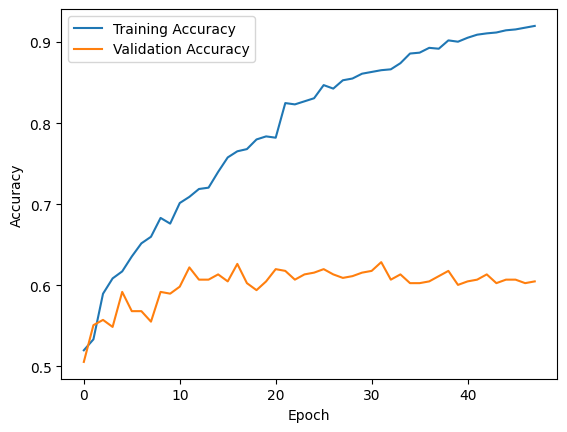

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
pred = model.predict(val_inputs)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [21]:
val_inputs[0][0], val_inputs[1][0], val_inputs[2][0], val_labels[0], pred[0]

(<tf.Tensor: shape=(1, 23), dtype=float64, numpy=
 array([[  1.        ,   8.        ,   3.        ,   5.        ,
           0.        ,   0.        ,   0.6       ,   8.        ,
         258.        , 118.        ,  22.35      ,   8.85      ,
           9.        ,   5.        ,   3.        ,   0.        ,
           1.        ,   1.66666667,   9.        , 200.        ,
         111.        ,  23.1       ,   8.51      ]])>,
 <tf.Tensor: shape=(22, 22), dtype=float64, numpy=
 array([[8.00000000e+00, 6.00000000e+00, 1.08000000e+02, 1.58820000e+02,
         2.16000000e+01, 2.26200000e+01, 1.82000000e+02, 9.00000000e+00,
         1.63500000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 3.00000000e+00,
         0.00000000e+00, 2.72727273e-01],
        [8.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+02,
         1.00000000e+00, 5.86000000e+00

In [31]:
tf.reshape(val_inputs[2][0:1][0, :200], (1, 200, 4))

<tf.Tensor: shape=(1, 200, 4), dtype=float32, numpy=
array([[[1.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
        [1.00e+00, 2.00e-01, 4.00e+00, 0.00e+00],
        [1.00e+00, 3.00e-01, 5.00e+00, 0.00e+00],
        [1.00e+00, 4.00e-01, 7.00e+00, 0.00e+00],
        [1.00e+00, 5.00e-01, 1.00e+01, 0.00e+00],
        [1.00e+00, 6.00e-01, 1.20e+01, 0.00e+00],
        [1.00e+00, 7.00e-01, 1.60e+01, 0.00e+00],
        [1.00e+00, 8.00e-01, 1.60e+01, 0.00e+00],
        [1.00e+00, 1.10e+00, 1.60e+01, 1.00e+00],
        [1.00e+00, 1.20e+00, 1.70e+01, 1.00e+00],
        [1.00e+00, 1.30e+00, 1.70e+01, 1.00e+00],
        [1.00e+00, 1.40e+00, 2.10e+01, 1.00e+00],
        [1.00e+00, 1.50e+00, 2.50e+01, 1.00e+00],
        [1.00e+00, 1.60e+00, 2.60e+01, 1.00e+00],
        [1.00e+00, 2.10e+00, 2.60e+01, 1.00e+00],
        [1.00e+00, 2.20e+00, 2.60e+01, 1.00e+00],
        [1.00e+00, 2.30e+00, 2.70e+01, 1.00e+00],
        [1.00e+00, 2.40e+00, 2.70e+01, 1.00e+00],
        [1.00e+00, 2.50e+00, 2.70e+01, 1.00e+00

In [32]:
model.predict([val_inputs[0][0:1], val_inputs[1][0:1], tf.reshape(val_inputs[2][0:1][0, :200], (1, 200, 4))])

2024-11-04 05:36:28.181817: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 4 bytes spill stores, 4 bytes spill loads

2024-11-04 05:36:36.934227: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24', 128 bytes spill stores, 128 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


array([[1.4254458e-07]], dtype=float32)